In [93]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as progress

In [94]:
def directcalc(M,i,v_plus,v_null,limit=20):
    s=0
    ks = np.arange(limit)
    sums = np.empty(limit)
    for k in progress(ks):
        pwr_term = np.dot(M,np.dot(v_null,v_null.T))
        pwr = np.linalg.matrix_power(pwr_term,k)
        sums[k] = np.dot(i,np.dot(pwr,np.dot(M,v_plus)))
    
    return ks, np.cumsum(sums)

In [117]:
def getRandomM(N=100,discrete=True):
    if discrete:
        m1 = (np.random.random((N,N)) < 0.5).astype(np.float64)
    else:
        m1 = np.random.random((N,N))
    M_ = np.triu(m1,1)
    M_ = M_ + M_.T
    M = np.dot(np.diag(np.divide(1,np.sum(M_,axis=1))),M_)
    selection_M = np.cumsum(M,axis=1)
    return M, selection_M

In [96]:
def defineParitions(N=100):
    p1_limit = int(N/3)
    p2_limit = p1_limit * 2
    partitions = np.zeros(N)
    partitions[p1_limit:p2_limit] = 1
    partitions[p2_limit:] = 2
    return partitions

In [97]:
def getNewPosition(i,selection_M):
    r = np.random.random()
    choices = selection_M[i,:]
    j = np.where(choices > r)[0][0]
    return j

In [98]:
def montecarlo(selection_M,partition):
    trials = 10000
    success = 0.0
    failure = 0.0
    
    for x in progress(range(trials)):
        i=0
        while partition[i] == 0:
            i = getNewPosition(i,selection_M)
        if partition[i] == 1:
            failure = failure + 1
        else:
            success = success + 1
    return success/trials, failure/trials

In [108]:
def compare():
    partitions= defineParitions(N=10)
    v_null = (partitions == 0).astype(int).reshape(len(partitions),1)
    v_plus = (partitions == 2).astype(int).reshape(len(partitions),1)
    i = np.zeros(len(partitions))
    i[0] = 1
    
    M, selection_M = getRandomM(N=10)
    
    _,direct_prob = directcalc(M,i,v_plus,v_null,limit=80)
    mc_success,_ = montecarlo(selection_M,partitions)
    return direct_prob, mc_success

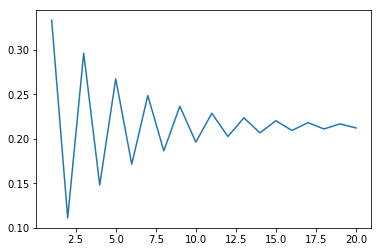

In [133]:
M,_ = getRandomM(N=5,discrete=True)
v = np.array([[0,0,1,0,0]]).T
jumps=20
probs = np.zeros(jumps)
for x in range(jumps):
    probs[x] = np.dot(np.linalg.matrix_power(M,x+1),v)[4]

plt.plot(np.arange(jumps)+1,probs)
plt.show()

In [135]:
u,v  = np.linalg.eig(M)

In [136]:
u

array([-8.04737854e-01,  1.38071187e-01,  1.00000000e+00, -3.33333333e-01,
        1.26133335e-33])

In [137]:
v[:,2]

array([-0.4472136, -0.4472136, -0.4472136, -0.4472136, -0.4472136])